In [40]:
import pandas as pd

import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(16, 8)})


random brian notes

 Roughly speaking, the theta frequency in the frontal cortex is positively correlated with increasing CWL, while conversely, the alpha frequency of the parietal cortex decreases as CWL increases (Gevins et al., 1997; Lei & Roetting, 2011). 

[] filter for scenarios where the signal quality is good

[] then we observe across channels

[] then across multiple sessions

[] then across multiple participants

[] then we have a baseline for the power spectral data

In [41]:
def get_powerSpectrumSignalQuality(runTimestamp: str, download: bool = False):
    df_powerSpectrum = pd.read_json(f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/powerByBand_{runTimestamp}.json")
    df_signalQuality = pd.read_json(f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/signalQuality_{runTimestamp}.json")

    # average signal quality values per timestamp entries
    df_signalQuality = df_signalQuality.groupby(by="unixTimestamp").mean()
    df_signalQuality.reset_index(level=0, inplace=True)

    # average powerspectrum values per timestamp entries
    df_powerSpectrum = df_powerSpectrum.groupby(by="unixTimestamp").mean()
    df_powerSpectrum.reset_index(level=0, inplace=True)

    # set both timestamp columns to datetime    
    df_powerSpectrum['unixTimestamp']= pd.to_datetime(df_powerSpectrum['unixTimestamp'], unit='s', utc=True)
    df_signalQuality['unixTimestamp'] = pd.to_datetime(df_signalQuality['unixTimestamp'], unit='s', utc=True)

    # merge df
    df_powerSpectrum_signalQuality = df_powerSpectrum.join(df_signalQuality.set_index('unixTimestamp'), on='unixTimestamp')

    # rename columns
    rename_obj = {}
    for channel in ['CP3','C3','F5','PO3', 'PO4', 'F6', 'C4','CP4']:
        rename_obj[f'{channel}_value'] = f'{channel}_stdvalue'
    if len(rename_obj) > 0:
        df_powerSpectrum_signalQuality.rename(columns=rename_obj, inplace=True)
    
    if download:
        path = f"/Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/powerSpectrum_signalQuality_{runTimestamp}.json"
        df_powerSpectrum_signalQuality.to_json(path, orient='records')
        print(f"Written data to {path}")

    return df_powerSpectrum_signalQuality



In [12]:
# compare two recordings together 
import matplotlib.pyplot as plt

def compare_sessions(df1, df2, channel, band):
    df1 = df1[['unixTimestamp', channel + '_' + band, channel + '_value']]
    df2 = df2[['unixTimestamp', channel + '_' + band, channel + '_value']]
    df1 = df1[df1[channel + '_value'] < 15]
    df2 = df2[df2[channel + '_value'] < 15]
    df1 = df1.rename(columns={channel + '_' + band: 'power'})
    df2 = df2.rename(columns={channel + '_' + band: 'power'})
    df1['session'] = 1
    df2['session'] = 2
    # df = pd.concat([df1, df2])
    
    _, ax = plt.subplots(2)

    ax[0].set(ylim=(0, 10))
    ax[1].set(ylim=(0, 10))
    
    sns.lineplot(data=df1, x="unixTimestamp", y="power", hue="session", ax=ax[0])
    sns.lineplot(data=df2, x="unixTimestamp", y="power", hue="session", ax=ax[1])
    

In [42]:
session_a_df = get_powerSpectrumSignalQuality('1674454790')
session_b_df = get_powerSpectrumSignalQuality('1674630344')

In [43]:
session_b_df

,unixTimestamp,CP3_alpha,CP3_beta,CP3_delta,CP3_gamma,CP3_theta,C3_alpha,C3_beta,C3_delta,C3_gamma,C3_theta,F5_alpha,F5_beta,F5_delta,F5_gamma,F5_theta,PO3_alpha,PO3_beta,PO3_delta,PO3_gamma,PO3_theta,PO4_alpha,PO4_beta,PO4_delta,PO4_gamma,PO4_theta,F6_alpha,F6_beta,F6_delta,F6_gamma,F6_theta,C4_alpha,C4_beta,C4_delta,C4_gamma,C4_theta,CP4_alpha,CP4_beta,CP4_delta,CP4_gamma,CP4_theta,CP3_stdvalue,C3_stdvalue,F5_stdvalue,PO3_stdvalue,PO4_stdvalue,F6_stdvalue,C4_stdvalue,CP4_stdvalue
0,2023-01-25 07:05:46+00:00,202.216773,86.043286,656.774787,11.166512,479.134893,82.336960,35.239838,273.327190,4.205392,197.391563,303.312863,174.709715,866.676967,37.683519,658.251485,56.648893,25.863788,178.364892,3.782142,137.791621,120.639375,50.380232,355.600228,7.154462,273.767803,505.375110,243.051722,1566.135116,41.358258,1174.920566,45.336134,21.413441,138.588844,3.437978,106.989347,433.651400,186.518723,1405.315654,24.297521,1035.906803,33.553333,38.490000,36.273333,38.103333,54.220000,90.103333,36.843333,32.616667
1,2023-01-25 07:05:47+00:00,7.425824,3.398108,28.318192,0.461222,18.985395,6.276996,3.209917,17.452128,0.490179,14.132835,7.450965,4.362501,28.956057,1.110232,16.688214,6.985478,3.078980,13.985251,0.555211,13.162443,7.357425,3.069240,17.019897,0.511928,14.496591,9.155050,5.219855,43.426817,1.213357,20.221003,6.440543,3.096763,13.761020,0.514810,12.864673,7.238767,3.384239,42.771938,0.528015,22.662113,33.106000,30.312000,46.748000,31.126000,31.430000,36.512000,30.340000,30.158000
2,2023-01-25 07:05:48+00:00,5.252090,2.374258,10.756285,0.618005,9.145635,5.099001,1.741849,10.090785,0.469846,9.865776,10.998043,13.344204,9.136347,2.400297,7.716744,6.177009,2.050509,9.099709,0.424306,10.093212,7.021566,2.434054,8.796920,0.317265,8.876407,6.146558,6.630786,15.123740,1.326423,22.759333,4.567366,1.858597,9.927261,0.470803,11.101104,5.371661,2.639486,10.611568,0.670575,11.161042,23.315000,14.245000,31.270000,15.755000,18.035000,26.365000,13.335000,14.640000
3,2023-01-25 07:05:49+00:00,6.462923,2.600890,15.902204,0.740225,13.202476,4.627391,1.929574,11.506800,0.565340,9.383022,9.965850,7.315433,11.829339,1.472865,9.663321,4.514413,2.034396,10.963358,0.587120,9.216157,4.746282,1.993243,11.279070,0.560583,9.498326,9.105309,5.138442,14.200507,0.939001,12.401422,4.882483,2.088196,11.235602,0.566188,9.826512,5.372647,2.045317,11.702771,0.617204,9.261584,26.661667,19.638333,41.125000,18.840000,19.366667,33.933333,18.891667,20.548333
4,2023-01-25 07:05:50+00:00,7.626148,2.794098,11.497008,0.520143,9.749162,7.787042,2.643948,12.283102,0.611792,10.395596,9.554172,5.666773,10.884551,1.010488,10.834012,8.308239,2.919519,13.129415,0.632292,10.948115,6.631409,2.697794,8.291794,0.535754,7.933589,11.233239,5.123824,16.757505,0.756272,15.461537,6.685268,2.556630,10.791773,0.556579,10.071692,6.349782,2.566930,12.615733,0.534527,9.965223,27.442500,28.647500,33.512500,29.862500,21.747500,46.402500,26.062500,27.077500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,2023-01-25 07:15:41+00:00,1.489908,0.771730,2.903655,0.193787,2.482428,1.185342,0.797234,1.898163,0.187716,1.451835,13.476852,9.964475,11.890633,3.417789,9.151522,1.364216,0.906432,3.115310,0.243115,2.233636,1.344511,1.094324,3.441403,0.282456,2.783172,4.666260,2.652253,7.382267,1.390707,7.252241,1.581990,0.915179,4.845485,0.201049,3.899459,2.147608,1.123198,2.357282,0.255844,2.739362,6.830000,5.640000,67.746667,6.400000,8.330000,30.196667,8.903333,7.670000
577,2023-01-25 07:15:42+00:00,2.163697,1.066681,5.220971,0.326427,4.471100,2.032682,0.906318,6.713522,0.286821,5.078010,85.982027,33.018796,438.994911,11.436679,288.429960,2.318638,1.058046,6.466691,0.293023,4.956185,2.219105,1.120949,8.257975,0.328041,6.307749,15.566369,9.203346,69.170393,3.067593,53.186725,2.210326,0.896060,5.707227,0.263016,4.876719,4.579890,2.537960,19.371200,0.817459,14

In [44]:
session_a_df = session_a_df.iloc[2:]

In [45]:
session_b_df = session_b_df.iloc[2:]

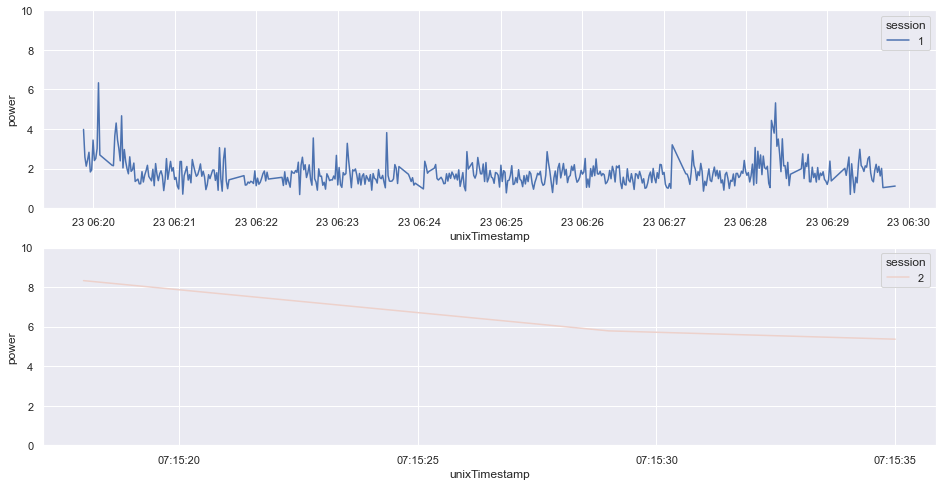

In [28]:
compare_sessions(session_a_df, session_b_df, 'F6', 'theta')

In [46]:
# join all the sessions for a day into one json
# input - day, find all recordings for the day & merge them into 1

get_powerSpectrumSignalQuality('1674454790', download=True)

Written data to /Users/oreogundipe/lab/fusion/neuroscripts/logger/archive/data/2022/ore/powerSpectrum_signalQuality_1674454790.json


,unixTimestamp,CP3_alpha,CP3_beta,CP3_delta,CP3_gamma,CP3_theta,C3_alpha,C3_beta,C3_delta,C3_gamma,C3_theta,F5_alpha,F5_beta,F5_delta,F5_gamma,F5_theta,PO3_alpha,PO3_beta,PO3_delta,PO3_gamma,PO3_theta,PO4_alpha,PO4_beta,PO4_delta,PO4_gamma,PO4_theta,F6_alpha,F6_beta,F6_delta,F6_gamma,F6_theta,C4_alpha,C4_beta,C4_delta,C4_gamma,C4_theta,CP4_alpha,CP4_beta,CP4_delta,CP4_gamma,CP4_theta,CP3_stdvalue,C3_stdvalue,F5_stdvalue,PO3_stdvalue,PO4_stdvalue,F6_stdvalue,C4_stdvalue,CP4_stdvalue
0,2023-01-23 06:19:51+00:00,350.069233,151.800899,1128.070625,20.343473,834.024609,531.761834,229.590165,1715.023012,30.461286,1266.724918,221.865789,96.338612,715.094961,12.757383,528.635836,253.675054,109.672117,820.198117,14.519095,606.162411,405.534669,175.195049,1309.458138,23.221439,968.337087,130.877142,57.068260,420.674410,7.571945,312.139689,427.837032,186.710304,1379.771321,24.884832,1025.465109,97.674060,42.297430,314.445128,5.664346,232.109452,9.5725,9.515000,10.0875,7.130000,7.310000,14.885000,28.3100,6.535000
1,2023-01-23 06:19:52+00:00,4.095093,1.611044,30.349270,0.455363,12.027859,5.912251,1.809990,45.124244,0.477724,17.885419,3.989631,1.391000,19.911477,0.371543,8.691340,3.724543,1.172106,21.713038,0.393303,8.906501,4.583904,1.616774,34.002061,0.523304,13.452219,4.650716,1.310395,14.123272,0.316650,8.298428,8.050535,2.234619,38.234622,0.667654,18.506480,2.024887,0.916648,9.470681,0.248291,4.049495,10.0725,9.227500,8.4325,6.477500,5.722500,15.010000,14.4550,7.447500
2,2023-01-23 06:19:53+00:00,3.464654,1.767511,7.060940,0.312210,6.083582,2.164451,1.306134,3.649629,0.266191,2.378155,1.563666,1.019689,1.912815,0.196139,1.841123,1.942486,1.034856,2.301468,0.169436,1.911673,2.050943,1.043536,2.486854,0.152545,2.487042,2.194498,1.458522,5.161242,0.216723,3.976220,2.874115,1.768630,5.154229,0.280175,4.748704,1.677528,1.078343,3.560273,0.189025,2.858119,13.8050,9.022500,6.5075,5.995000,6.322500,10.757500,10.5300,7.272500
3,2023-01-23 06:19:54+00:00,2.937172,1.765956,6.351007,0.302789,6.608887,2.418466,0.904032,2.298290,0.143969,2.130271,2.150430,1.019552,2.485052,0.165421,2.348604,1.694408,0.848882,2.804785,0.158156,2.089086,1.850335,1.075281,1.808471,0.114732,1.572247,2.877198,1.101761,4.138451,0.217334,2.579466,2.588826,1.297085,4.212150,0.213999,3.441087,1.332415,0.812929,2.290244,0.130950,1.750675,14.5150,7.382500,6.7525,6.942500,6.510000,9.070000,10.9300,5.565000
4,2023-01-23 06:19:55+00:00,3.782501,2.698244,8.796332,0.461086,6.680092,1.531091,0.848923,2.033402,0.126856,1.481435,1.648444,1.107393,2.348616,0.147781,2.604561,2.155739,0.857802,3.400332,0.120462,2.432792,2.176522,0.861569,1.878797,0.117591,1.978518,2.703285,1.078138,1.852913,0.145181,2.118480,2.345592,1.171430,3.693150,0.216262,2.615605,1.837524,0.945472,2.344820,0.138302,1.886975,16.7775,5.492500,6.5275,7.027500,6.120000,7.297500,8.7150,6.155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2023-01-23 06:29:38+00:00,54.453871,19.661927,145.430645,2.949527,106.775108,1.164323,0.624169,0.904166,0.134360,0.824372,1.742470,0.812507,2.391771,0.182038,2.040567,2.207829,0.668112,1.822229,0.161694,1.521615,2.304844,0.704737,1.499018,0.142802,1.734098,1.740418,0.816765,2.051328,0.190949,2.108320,2.573248,1.946569,4.115477,0.292104,3.922276,1.489094,0.526284,1.716589,0.139875,1.538819,310.2400,4.103333,5.4500,5.223333,5.193333,6.243333,13.1100,4.413333
522,2023-01-23 06:29:39+00:00,3.163209,1.401513,19.954815,0.412992,8.497137,1.294849,0.713341,1.268238,0.136539,1.271062,1.265181,0.761119,2.238922,0.164824,1.988603,2.687344,0.809496,1.814596,0.187099,1.752993,3.726515,1.096966,2.047960,0.198332,2.071284,1.498632,0.864788,1.689977,0.193924,1.623336,2.257116,0.844336,1.575196,0.175909,2.287140,2.457959,0.720405,1.984461,0.157591,2.218502,52.8025,4.185000,5.4875,7.525000,8.015000,5.812500,5.8100,5.990000
523,2023-01-23 06:29:40+0

In [ ]:

# TODO: brain power & health vis

# TODO: brain power & productivity vis

# TODO: now do average across a set of channels - move this to frontend

In [ ]:
# need to run data through Alex's app to see what I can learn from there

# also read about how to do time series analysis when values change .. 
# would it be better to just look at overall flow in between? like how do I summarize it?

In [ ]:
- [x] read through papers and see approaches
# you can compute relative power from absolute power dataset 